# Rishabh Pal

## Research question/interests

My research question is to analyze what categories of Apps on the Play Store App are the most installed and the factors that might affect what apps people might choose to Install. I will try to achieve this by going through all the data on on the Play Store Apps datset to see if I can spot any useful information.


In [9]:
# Library Imports
import pandas as pd
import numpy as np
import seaborn as sns

# Loading Datset
df = pd.read_csv('../data/raw/google_play_store.csv')

df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# Milestone 3
## Task 1: Exploratory Data Analysis


In [38]:
df.tail()

,index,App Name,Category,Rating,Reviews,Size (MB),Installs,Type,Price ($),Content Rating,Genres
9361,10834,FR Calculator,FAMILY,4.0,7,2.6,500.0,Free,0.0,Everyone,Education
9362,10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000.0,Free,0.0,Everyone,Education
9363,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100.0,Free,0.0,Everyone,Education
9364,10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000.0,Free,0.0,Mature 17+,Books & Reference
9365,10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19.0,10000000.0,Free,0.0,Everyone,Lifestyle


In [2]:
df.shape

(10841, 13)

The dataframe has 10841 rows and 13 columns. So, the data for 10841 apps has been collected for 13 attributes.

Next, I will look at the columns/attributes in this dataframe

In [3]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

Now, I will look at the general trends in the data to see how the values are distributed

In [4]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
App,10841,9660,ROBLOX,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,10841,34,FAMILY,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,9367.0,NaN,NaN,NaN,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0
Reviews,10841,6002,0,596,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Size,10841,462,Varies with device,1695,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Installs,10841,22,"1,000,000+",1579,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,10840,3,Free,10039,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,10841,93,0,10040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Content Rating,10840,6,Everyone,8714,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genres,10841,120,Tools,842,NaN,NaN,NaN,NaN,NaN,NaN,NaN


I can see that there are a lot of NAN values, I will have to clean this up in the data cleaning step

I also want to see the range of values for various attributes in this dataset

In [5]:
df.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

In [6]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [7]:
df.Installs.value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Free                 1
Name: Installs, dtype: int64

In [8]:
df.Category.value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [9]:
df.Genres.value_counts()

Tools                     842
Entertainment             623
Education                 549
Medical                   463
Business                  460
                         ... 
Arcade;Pretend Play         1
Card;Brain Games            1
Lifestyle;Pretend Play      1
Comics;Creativity           1
Strategy;Creativity         1
Name: Genres, Length: 120, dtype: int64

In [10]:
df.Price.value_counts()

0         10040
$0.99       148
$2.99       129
$1.99        73
$4.99        72
          ...  
$1.75         1
$14.00        1
$4.85         1
$46.99        1
$1.04         1
Name: Price, Length: 93, dtype: int64

In [11]:
df.Rating.value_counts()

4.4     1109
4.3     1076
4.5     1038
4.2      952
4.6      823
4.1      708
4.0      568
4.7      499
3.9      386
3.8      303
5.0      274
3.7      239
4.8      234
3.6      174
3.5      163
3.4      128
3.3      102
4.9       87
3.0       83
3.1       69
3.2       64
2.9       45
2.8       42
2.7       25
2.6       25
2.5       21
2.3       20
2.4       19
1.0       16
2.2       14
1.9       13
2.0       12
1.7        8
1.8        8
2.1        8
1.6        4
1.4        3
1.5        3
1.2        1
19.0       1
Name: Rating, dtype: int64

In [12]:
df['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [13]:
df['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

I can see that 'Ratings' has the most null values. By looking at the other attributes, it is unlikely that versions will be
of use to me. I will remove them in the data cleaning step. I can also see that using 'Categories' instead of 'Genres' will
be more effective for my intended analysis.

In [14]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

Out of all the attributes, only Rating is categorized as a float. I need other number based attributes to be floats for my analysis. I will convert them in data cleaning.

(0.0, 5.0)

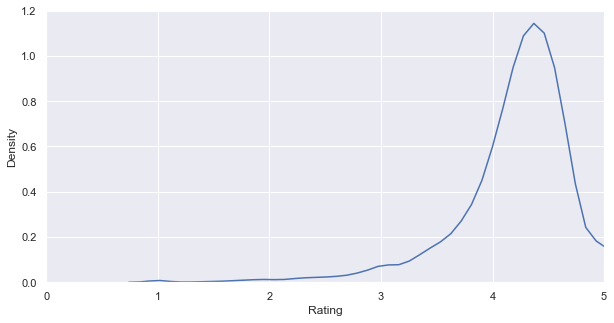

In [54]:
sns.set(rc={"figure.figsize":(10, 5)}) 
sns.kdeplot(data=df, x = 'Rating').set_xlim(0, 5.0)

<AxesSubplot:xlabel='Type', ylabel='Category'>

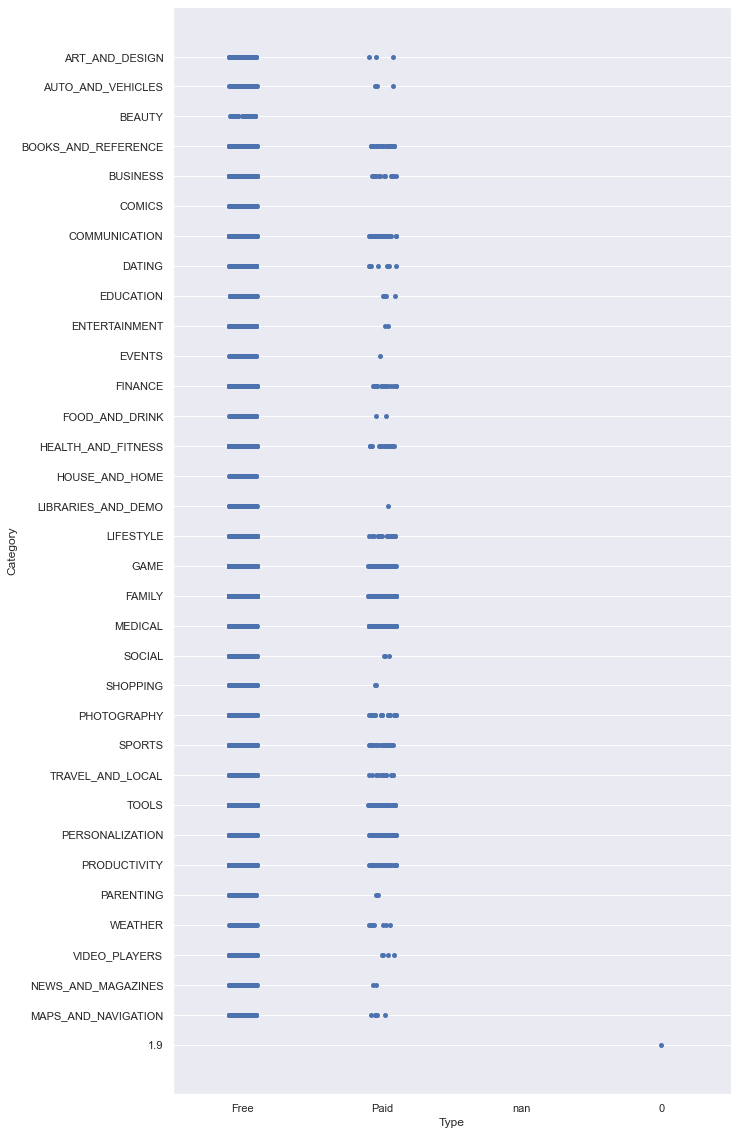

In [53]:
sns.set(rc={"figure.figsize":(10, 20)})
sns.stripplot(data=df, x= 'Type', y="Category")

<AxesSubplot:xlabel='Content Rating', ylabel='count'>

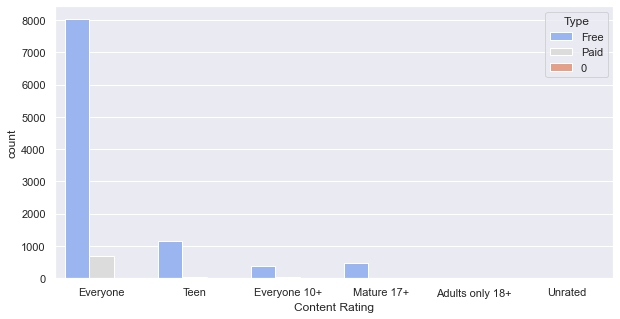

In [23]:
sns.countplot(data=df, x= 'Content Rating', hue = 'Type', palette = 'coolwarm')

### Observations
1. Most apps have a rating above 4. 
2. Most of the apps in this dataset are free.
3. The likelihood of an app being paid for a specific rated group like Teen or Mature is much less than the likelihood of apps being paid when they are rated for everyone. This makes sense as developers of paid apps would likely want to maximise revenue.
4. Since paid apps are very few and most of the apps are rated for everyone, Content Rating and Price are unlikely to skew results of my analysis.

# Task 2: Analysis Pipeline


### 1 - Load Data 
Data has already been loaded above

### 2 - Clean Data


In [17]:
# Remove unwanted columns
df = df.drop(["Last Updated","Current Ver","Android Ver"],axis=1)

# Remove rows with null values
df = df.dropna()
# Reset Index
df = df.reset_index()

# Remove '+' and ',' from installs column to make it numeric
df['Installs'] = df['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else x)
df['Installs'] = df['Installs'].astype(float)

# Convert all app sizes to MB
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)

# Replace 'Varies with device' with 'Nan' from size column to make it numeric
df['Size'] = df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)

# Remove 'M' from size column to make it numeric
df['Size'] = df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].astype(float)

# Remove '$' from price column to make it numeric
df['Price'] = df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else x)
df['Price'] = df['Price'].astype(float)

# Renaming some columns
df = df.rename(columns = {'App':'App Name', 'Size':'Size (MB)', 'Price':'Price ($)'})


df.head()


,index,App Name,Category,Rating,Reviews,Size (MB),Installs,Type,Price ($),Content Rating,Genres
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,Free,0.0,Teen,Art & Design
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity


## Task 3

### Wrapping method chain in function

In [11]:
import project_functions2 as bread
final = bread.load_and_process('../data/raw/google_play_store.csv')
final

,index,App Name,Category,Rating,Reviews,Size_MB,Installs,Type,Price_USD,Content Rating,Genres,Rating_Dist,Size_MB_Dist
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,4 - 4.5,0 - 20 MB
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,3.5 - 4,0 - 20 MB
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,Above 4.5,0 - 20 MB
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,Free,0.0,Teen,Art & Design,Above 4.5,20 - 40 MB
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,4 - 4.5,0 - 20 MB
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9361,10834,FR Calculator,FAMILY,4.0,7,2.6,500.0,Free,0.0,Everyone,Education,4 - 4.5,0 - 20 MB
9362,10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000.0,Free,0.0,Everyone,Education,Above 4.5,40 - 60 MB
9363,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100.0,Free,0.0,Everyone,Education,Above 4.5,0 - 20 MB
9364,10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000.0,Free,0.0,Mature 17+,Books & Reference,Above 4.5,0


Here I have transferred my data cleaning and data wrangling method chain into a .py file. This produces the output that I wanted. I added 2 new columns called Rating_Dist and Size_MB_Dist which are distributions of App Rating and App Sizes. These distrubutions will make it easier to identify patterns in the data and help me in my analysis.

# Task 4 - Data Analysis

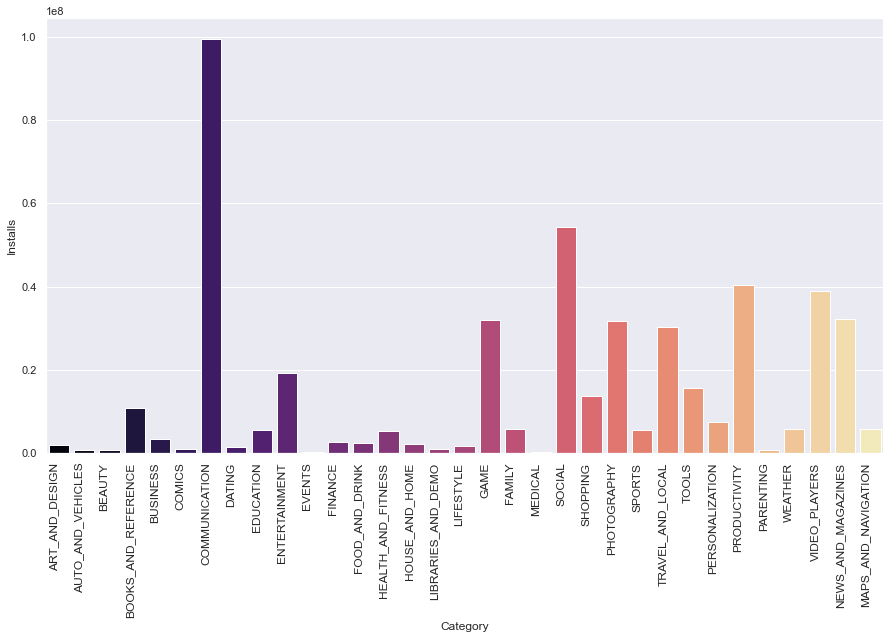

In [41]:
sns.set(rc={"figure.figsize":(15, 8)}) 
fig1 = sns.barplot(x = 'Category',
            y = 'Installs',
        data = final,
            errorbar=None,
            palette = 'magma'
).set_xticklabels(
    fig1.get_xticklabels(), 
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium'
    
)

## Figure 1 
### Barplot showing the relationship bewtween App Categories and App Installs
#### Observations
The top 3 app categories for total installs are 

1. Communication
2. Social
3. Productivity

The least downloaded apps belong to the following categories

- Medical
- Auto & Vehicles
- Events
- Beauty
- Parenting
- Libraries and Demo

This makes sense as most of us use our phones for communication, using social media and to keep our life organized through increased productivity. The apps belonging to the least downloaded categories cater to a certain subset of the population and are not likely to appeal to the wider population of people who download apps through the Play Store.

I will now look for other things that might have an impact on Installs.

Text(0.5, 1.0, 'Heatmap of Play Store Attributes')

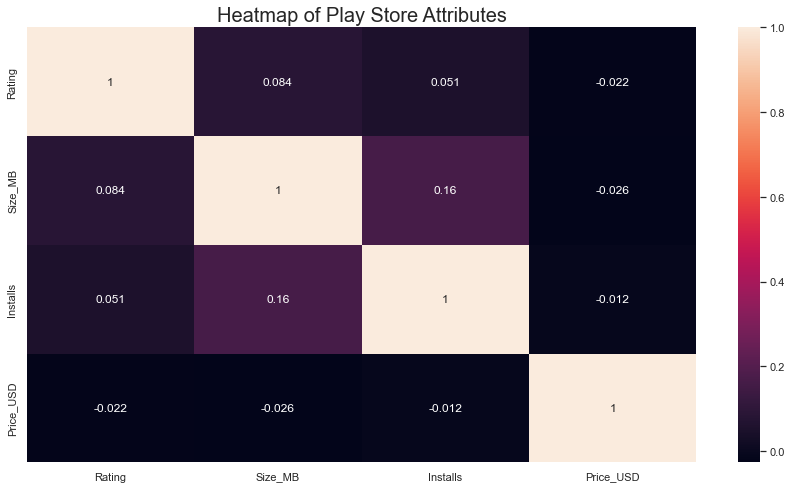

In [45]:
sns.set(rc={"figure.figsize":(15, 8)}) 
corr= final.drop(['index'], axis = 1).corr()
sns.heatmap(corr, annot=True).set_title("Heatmap of Play Store Attributes",fontsize=20)

## Figure 2
Heatmap showing the relationships attributes share with each other. Since my EDA showed me that paid apps are very few, I will not explore it further. I will examine App Size and App Rating since there is some correlation there.

[Text(0, 0.5, 'Rating Distributions'),
 Text(0.5, 1.0, 'Rating Distributions vs Installs')]

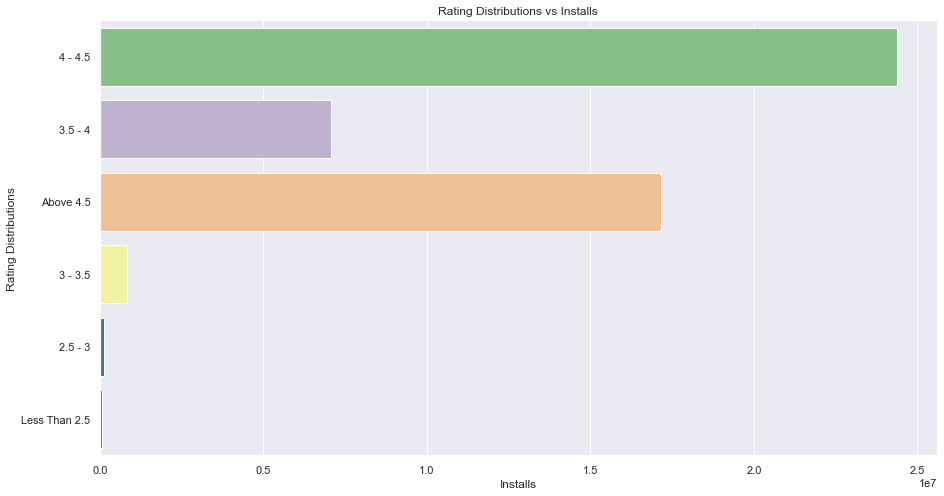

In [47]:
sns.set(rc={"figure.figsize":(15, 8)}) 
sns.barplot(x = 'Installs',
            y = 'Rating_Dist',
        data = final,
            palette = 'Accent',
            errorbar = None
).set(ylabel="Rating Distributions", title = "Rating Distributions vs Installs")


## Figure 3 
### Barplot showing relationships between App Installs and App Rating

#### Observations

- Higher App Ratings lead to higher number of Installs.
- The most installed apps are rated between 4 and 4.5
- App installs fall for every increment below 4.
- Apps rated less than 2.5 are barely installed and account for even less installs than the next group, 2.5 - 3
- If this pattern were consistent, apps rated above 4.5 should have been installed the most. It is likely however that ratings that high are hard to achieve and that is why they're not at the top.



[Text(0, 0.5, 'Size Distributions'),
 Text(0.5, 1.0, 'Size Distributions vs Installs')]

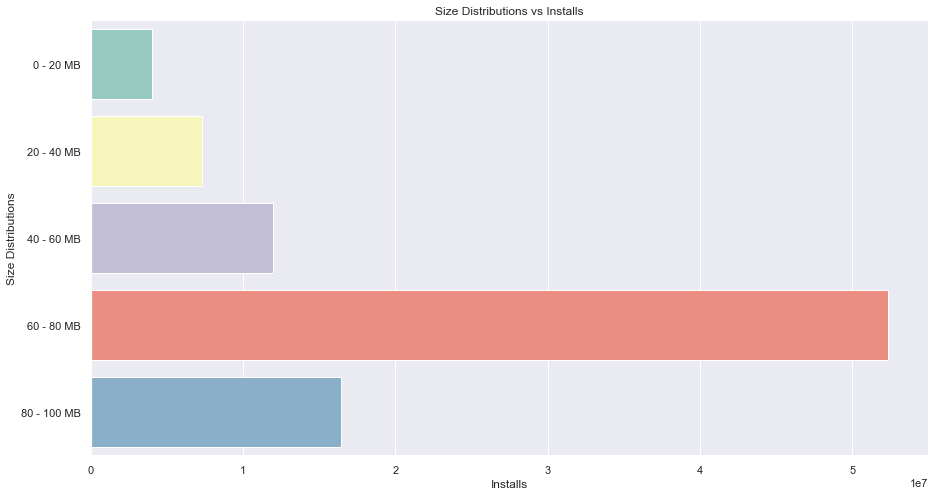

In [49]:
sns.set(rc={"figure.figsize":(15, 8)}) 
filtered = final.dropna()
sns.barplot(x = 'Installs',
            y = 'Size_MB_Dist',
        data = filtered,
            errorbar=None,
            palette ='Set3'
).set(ylabel="Size Distributions", title = "Size Distributions vs Installs")

## Figure 4 
### Barplot showing relationships between App Installs and App Size
Created a filtered dataframe to drop apps that vary with device and were replaced by NaN values in the data cleaning step. I did not remove them earlier because they were still useful for my earlier analysis.
Max size distribution is 80 MB - 100 MB because the max app size in this dataFrame is 100 MB
#### Observations
- Higher App Sizes account for a higher number of Installs.
- The most installed apps are between 60 - 80 MB.
- App installs fall for every increment below 60 MB.
- Least installed apps have sizes between 0 - 20 MB.
- This is most likely because apps with higher app sizes can provide more functionality and are more feature rich than lower sized apps.
- This shows that bigger app sizes are not a limitation and people are willing to install them if they get what they need.

[Text(0.5, 0, 'Rating and Size Distribution'),
 Text(0.5, 1.0, 'Rating and Size vs Installs')]

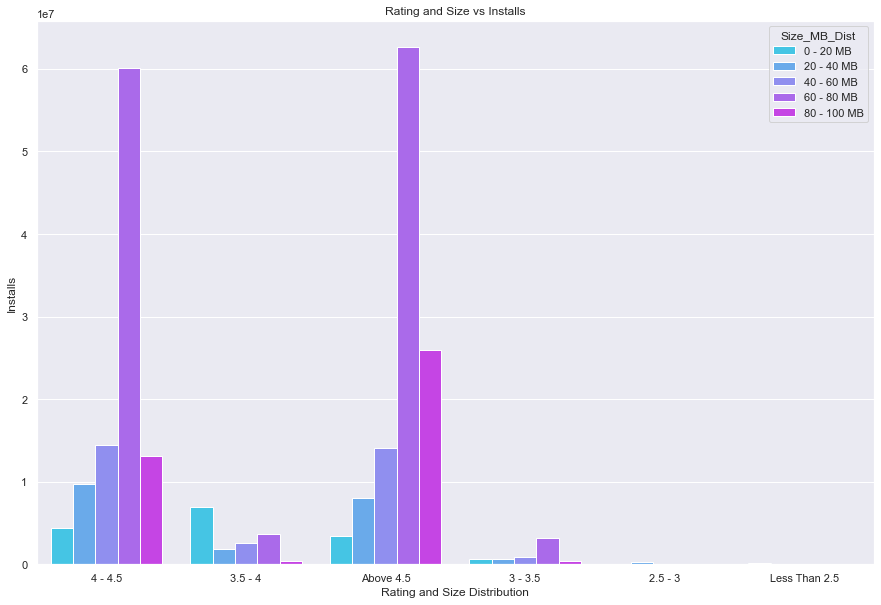

In [50]:
sns.set(rc={"figure.figsize":(15, 10)}) 
sns.barplot(
            x= 'Rating_Dist',
            y = 'Installs',
            hue = 'Size_MB_Dist',
            data = filtered,
            errorbar=None,
            palette ='cool'
).set(xlabel="Rating and Size Distribution", title = "Rating and Size vs Installs")


## Figure 5
### Barplot showing relationships between App Installs and App Rating and Size distributions
#### Observations
- Earlier findings are fairly consistent with most rating groups having apps sized 60 - 80 MB being most installed.
- Apps in the 3.5 - 4 rating group are the only different ones wheres apps sized 0 - 20 MB take the lead.
- This could be becuase apps in this group are a lower overall proportion than apps rated higher and could lack functionality that comes with higher app sizes that could lead to better ratings.

# Results and Conclusion 

In my analysis, I have created different visualizations to accomplish my goals of studying app installs through the play store app.
The visualizations provide the following insights that can be used by android app developers in creating new apps :
1. Apps that belong to categories that have a mass appeal are more likely to be installed with apps being in the communication, social and productivity categories being the most installed as shown in Fig. 1. Developers should therefore try to create apps that can be used many people and even if they want to target a specific niche, they could try adding social and communication feautures to their apps to boost their install rates.
2. Higher ratings lead to a higher number of installs (Fig. 3) so developers should continously monitor app reviews and implement changes requested by their users to increase app rating.
3. People do not mind downloading bigger sized apps so while developers should not create bloated apps just to increase size, they should not hesitate in adding additional functionality because their app size might increase.